<a href="https://colab.research.google.com/github/isaaccs/sentiment-analysis-for-financial-news/blob/master/sentiment_analysis_for_financial_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal : Exploratory Data Analysis for Natural Language Processing on Financial Data

Text is an unstructured data which can provide a lot of information. And doing a statistical analysis on it allows to draw some information.

This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. 

The idea is to use Data Analysis for helps us identify words, or combination of word for a better understanding of the market.

* What are the most commun words ?
* Are there significant words ?
* How to use N-grams ?


In [13]:
import pandas as pd
import nltk
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
url='https://raw.githubusercontent.com/isaaccs/sentiment-analysis-for-financial-news/master/all-data.csv'
data=pd.read_csv(url, encoding="cp1252",header=None)

In [15]:
data.columns = ['sentiment','text']
data.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


There are 4846 observations
There are 2 columns 

There are no missing values 

sentiment seems to be a categorical feature 

labels repartition in % 

neutral     59.409823
positive    28.126290
negative    12.463888
Name: sentiment, dtype: float64


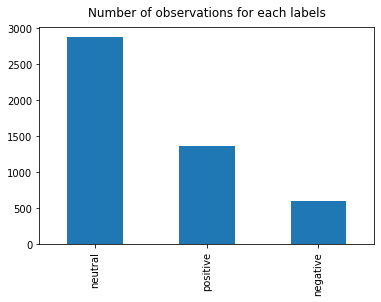

In [16]:
def classical_data_stat(data,y):  
  """Inputs : dataset and target variable
    Outpus : some satistical about the dataset and Y"""
  print('There are {} observations'.format(data.shape[0]))
  print('There are {} columns \n'.format(data.shape[1]))
  if not data.isnull().values.any():
    print('There are no missing values \n')
  else :   
    print('There are  missing values \n')
  if len(data[y].unique())<50:
    print('{} seems to be a categorical feature \n'.format(y))
    data[y].value_counts().plot(kind='bar')
    plt.title("Number of observations for each labels", y=1.02)
    print('labels repartition in % \n')
    print(100*data[y].value_counts()/data.shape[0])
  else:
    print('{} seems to be a continous feature \n'.format(y))   
classical_data_stat(data,'sentiment')    

# Pre processing Step 

## Data Cleaning

The first step is to clean the dataset, that's means:
* Remove punctuation.
* Remove stop word.
* Normalize (by applying a Stemmer or a Lemmatizer ).
* Set all characters to lowercase.
* Remove numbers (or convert numbers to textual representations).

In [0]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  """ INPUT : Sentence
  OUTPUT : Sentence
  Pre processing step for a pandas dataset """
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)


data['text']=data['text'].map(lambda s:preprocess(s)) 

## N-Grams

The second step is to create new features with the N-Grams

An n-gram is a contiguous sequence of n items from a given sample of text or speech.

In [0]:
def ngrams(input, n):
    """ INPUT : Sentence and number of n-grams
  OUTPUT N-Grams
  An n-gram is a contiguous sequence of n items from a given sample of text or speech.
  """
    output = []
    for i in range(len(input)-n+1):
        output.append('_'.join(input[i:i+n]))
    return output

In [19]:


nltk.download('punkt')
tags = ['neutral','negative','positive'] 



data_bis = data[data.sentiment.isin(tags)]
##Create N-Grams
data_bis['Tokens'] = data_bis.apply(lambda row: nltk.word_tokenize(row['text'].strip()), axis=1)
data_bis['bi_Grams']  = data_bis.apply(lambda row: ngrams(row['Tokens'], 2), axis=1)
data_bis['tri_Grams']  = data_bis.apply(lambda row: ngrams(row['Tokens'], 3), axis=1)
print(len(data_bis),'samples from',len(tags),'classes')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
4846 samples from 3 classes


# What are the most common word ?

## Worcloud 

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
It is often found on social networks, it is a tool widely used by digital marketers


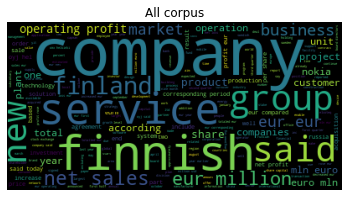

<Figure size 432x288 with 0 Axes>

In [20]:
def plot_word_cloud(data,text='text',label=None,save=True):
  """ Inputs : Dataset, text colums,labels column
  Output : Word cloud for all the corpus and for each label"""
  word_cloud_data = " ".join([post for post in data[text] ])
  word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
  plt.figure()
  plt.imshow(word_cloud_data)
  plt.title('All corpus')
  plt.axis("off")
  plt.show()
  if save:
    plt.savefig('wordcloud.png', dpi=300)
  if label !=None:
    labels=data[label].unique()
    for i in range(len(labels)):
          word_cloud_data = " ".join([post for (post,label) in zip(data[text],data[label]) if label==labels[i]])
          word_cloud_data = WordCloud(stopwords=STOPWORDS).generate(word_cloud_data)
          plt.figure(i)
          plt.imshow(word_cloud_data)
          plt.title('{}'.format(labels[i]))
          plt.axis("off")
plot_word_cloud(data,text='text')

For each labels

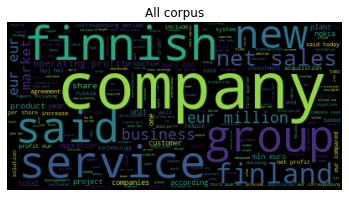

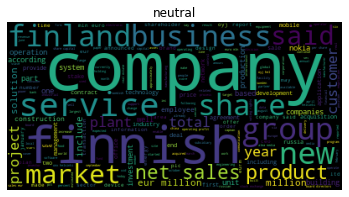

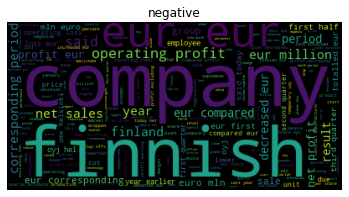

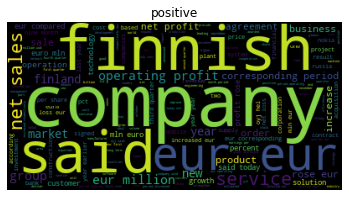

In [21]:
plot_word_cloud(data,'text','sentiment',False)

Word cloud helps us identify the most common word on each label. But as we can see here, “Company” and “Finnish” are very present in all classes, and we dont really know in what proportion.


## Word Frequencies

In this step, we decide to look at the words that are most present in our corpus.

In [22]:
def word_frequencies(data,word):

  c_unique = Counter()
  for ind in data.index:
      c_unique.update(Counter(set(data.loc[ind][word])))

  print('First 20 common words:\n')
  for word in c_unique.most_common(20):
      print(word[0],'-->', 'appeared in',word[1],'documents out of {} documents i.e.'.format(len(data)),np.round(100*word[1]/len(data),2),'%')

word_frequencies(data_bis,'Tokens')

First 20 common words:

company --> appeared in 801 documents out of 4846 documents i.e. 16.53 %
eur --> appeared in 801 documents out of 4846 documents i.e. 16.53 %
said --> appeared in 544 documents out of 4846 documents i.e. 11.23 %
finnish --> appeared in 512 documents out of 4846 documents i.e. 10.57 %
sales --> appeared in 428 documents out of 4846 documents i.e. 8.83 %
profit --> appeared in 406 documents out of 4846 documents i.e. 8.38 %
net --> appeared in 384 documents out of 4846 documents i.e. 7.92 %
year --> appeared in 341 documents out of 4846 documents i.e. 7.04 %
finland --> appeared in 331 documents out of 4846 documents i.e. 6.83 %
million --> appeared in 311 documents out of 4846 documents i.e. 6.42 %
group --> appeared in 305 documents out of 4846 documents i.e. 6.29 %
operating --> appeared in 294 documents out of 4846 documents i.e. 6.07 %
new --> appeared in 261 documents out of 4846 documents i.e. 5.39 %
business --> appeared in 251 documents out of 4846 docume

# Are there significant words ?

In [0]:
def stat_des_text(data,col,text,word):
  """ Inputs : Dataset, labels column, text colums, N-Grams, Worcloud
      Output : Word frequencie for each labels
  """
  labels=data[col].unique()

  c_unique = Counter()
  for ind in data_bis.index:
    c_unique.update(Counter(set(data.loc[ind][word])))

  labels=data[col].unique()
  tag_dict = {tag:Counter() for tag in labels} 
  b=['_Words','_%']
  for ind in data.index:
      tag = data.loc[ind][col]
      tag_dict[tag].update(Counter(set(data.loc[ind][word])))
  tag_specific_words = pd.DataFrame(columns=[label+number for label in labels for number in b])
  for tag in labels:
      len_tag = len(data[data[col]==tag])
      words = []
      percent = []
      for word in tag_dict[tag].most_common(16):
          words.append(word[0])
          percent.append(np.round(100*word[1]/len_tag,2))
      tag_specific_words[tag+'_Words'] = words
      tag_specific_words[tag+'_%'] = percent
  display(tag_specific_words)


  for n_stop_words in [50,500,5000]:
      tag_specific_words = pd.DataFrame(columns=[label+number for label in tags for number in b])
      print('Ignoring first',n_stop_words,'stop-words ##############')
      StopWords = [ii[0] for ii in c_unique.most_common(n_stop_words)]
      for tag in labels:
          len_tag = len(data[data[col]==tag])
          jj = 0
          words = []
          percent = []
          for word in tag_dict[tag].most_common(2*n_stop_words):
              if word[0] not in StopWords:
                  words.append(word[0])
                  percent.append(np.round(100*word[1]/len_tag,2))
                  jj += 1
              if jj == 20:
                  break
          tag_specific_words[tag+'_Words'] = words
          tag_specific_words[tag+'_%'] = percent
      display(tag_specific_words)
      print('\n\n')

In [24]:
stat_des_text(data_bis,'sentiment','text','Tokens')

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,company,16.43,eur,36.26,eur,24.14
1,eur,8.79,profit,25.66,company,17.02
2,said,8.23,finnish,16.23,said,16.87
3,finnish,7.47,operating,16.06,finnish,14.60
4,finland,7.36,company,15.89,profit,14.01
5,new,6.18,net,15.89,sales,13.28
6,business,6.15,sales,15.07,net,13.06
7,group,6.11,year,14.57,year,12.91
8,sales,5.42,period,13.91,operating,8.66
9,million,5.07,quarter,12.75,period,8.66


Ignoring first 50 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,value,2.78,decreased,10.93,rose,6.82
1,development,2.57,fell,7.45,increased,5.80
2,investment,2.50,result,5.79,increase,5.36
3,construction,2.47,earlier,5.13,signed,4.26
4,part,2.36,half,5.13,agreement,4.18
5,one,2.33,lower,4.64,percent,3.74
6,customers,2.19,third,4.30,growth,3.08
7,approximately,2.19,totalled,4.30,order,3.08
8,board,2.12,lay,3.64,last,2.93
9,stock,2.05,second,3.15,earlier,2.79





Ignoring first 500 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,espoo,0.69,temporarily,2.15,improved,1.54
1,options,0.66,dropped,2.15,narrowed,1.25
2,ahlstrom,0.66,jobs,1.99,versus,1.10
3,subscription,0.66,temporary,1.99,rise,1.03
4,subscribed,0.63,negative,1.99,efficiency,1.03
5,within,0.63,declined,1.82,strengthen,0.95
6,park,0.63,offs,1.82,estimates,0.95
7,alexandria,0.63,warning,1.82,metal,0.95
8,tikkurila,0.63,workers,1.66,able,0.95
9,france,0.63,fall,1.66,beer,0.88





Ignoring first 5000 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,motivate,0.03,pressed,0.17,unify,0.07
1,ultrascan,0.03,scanned,0.17,army,0.07
2,crackers,0.03,disappeared,0.17,classroom,0.07
3,password,0.03,arokarhu,0.17,teachers,0.07
4,skilled,0.03,aiming,0.17,entering,0.07
5,adult,0.03,biocare,0.17,oats,0.07
6,nursing,0.03,scala,0.17,phonebook,0.07
7,assistance,0.03,nobel,0.17,kouvola,0.07
8,addus,0.03,bucking,0.17,metrics,0.07
9,rehabilitative,0.03,slipping,0.17,scorecard,0.07


The words found here can be considered as stop words. Indeed, if they are present in each label with similar proportions, it is very likely that they do not provide information.

While we are looking at the most common words of all the data set, zooming in on each label can guide us.

# How to use N-grams ?


In [25]:
stat_des_text(data_bis,'sentiment','text','bi_Grams')

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,net_sales,3.30,eur_eur,10.93,eur_eur,8.73
1,eur_million,2.33,operating_profit,9.60,net_sales,7.34
2,company_said,1.42,net_sales,7.95,operating_profit,7.34
3,share_capital,1.29,corresponding_period,7.28,corresponding_period,4.55
4,operating_profit,1.22,eur_compared,6.62,eur_million,4.48
5,stock_exchange,1.11,decreased_eur,6.62,rose_eur,3.96
6,sales_eur,1.04,profit_eur,5.79,net_profit,3.82
7,mln_euro,1.04,eur_corresponding,5.63,eur_compared,3.30
8,omx_helsinki,1.04,net_profit,5.63,said_today,3.23
9,alma_media,1.01,eur_million,4.64,profit_rose,3.15


Ignoring first 50 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,voting_rights,0.87,compared_profit,2.98,first_nine,1.69
1,real_estate,0.80,fell_eur,2.65,period_increased,1.47
2,new_shares,0.66,non_recurring,2.48,sales_increased,1.25
3,general_meeting,0.66,profit_fell,2.48,respectively_eur,1.25
4,eur_per,0.63,recurring_items,2.32,adp_news,1.25
5,finnish_company,0.59,sales_decreased,2.32,increased_respectively,1.17
6,helsinki_finland,0.56,profit_decreased,2.32,today_net,1.17
7,nasdaq_omx,0.52,share_eps,1.82,compared_corresponding,1.10
8,financial_details,0.52,excluding_non,1.82,signed_agreement,1.10
9,stock_option,0.49,amounted_eur,1.66,cash_flow,1.10





Ignoring first 500 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,operating_system,0.21,slipped_net,0.83,rose_year,0.37
1,value_deal,0.21,personnel_reductions,0.83,sales_grew,0.37
2,high_performance,0.21,loss_totaled,0.83,finnish_lifting,0.37
3,said_agreed,0.21,issued_profit,0.83,orders_worth,0.37
4,subscription_period,0.21,dropped_eur,0.83,user_experience,0.37
5,subscription_price,0.21,eur_turnover,0.83,automation_solution,0.37
6,outlook_pharmaceutical,0.21,profit_month,0.83,profit_improved,0.37
7,building_construction,0.21,helsinki_pct,0.83,annual_savings,0.37
8,gross_area,0.21,declined_eur,0.83,swung_net,0.37
9,media_corporation,0.21,half_eur,0.66,nine_month,0.29





Ignoring first 5000 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,gran_company,0.03,contracted_ranks,0.17,materials_therefore,0.07
1,russia_although,0.03,tallinn_facility,0.17,increase_capacity,0.07
2,company_growing,0.03,facility_contrary,0.17,would_improve,0.07
3,according_gran,0.03,employees_tallinn,0.17,production_profitability,0.07
4,although_company,0.03,daily_postimees,0.17,capacity_meet,0.07
5,plans_move,0.03,contrary_earlier,0.17,improve_use,0.07
6,move_production,0.03,electronic_industry,0.17,increase_production,0.07
7,area_less,0.03,layoffs_company,0.17,meet_expected,0.07
8,order_host,0.03,earlier_layoffs,0.17,therefore_increase,0.07
9,host_companies,0.03,international_electronic,0.17,increase_demand,0.07


In [26]:
stat_des_text(data_bis,'sentiment','text','tri_Grams')

,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,net_sales_eur,0.97,eur_corresponding_period,5.63,eur_corresponding_period,2.93
1,mln_euro_mln,0.94,decreased_eur_eur,2.98,rose_eur_eur,2.64
2,operating_profit_eur,0.69,compared_profit_eur,2.81,profit_rose_eur,2.42
3,eur_per_share,0.59,mln_euro_mln,2.48,mln_euro_mln,2.05
4,nasdaq_omx_helsinki,0.49,eur_compared_profit,2.32,first_nine_months,1.69
5,eur_net_sales,0.49,non_recurring_items,2.32,eur_million_usd,1.69
6,annual_general_meeting,0.45,eur_eur_corresponding,2.15,eur_eur_corresponding,1.54
7,stock_exchange_release,0.42,eur_compared_eur,2.15,operating_profit_rose,1.54
8,net_sales_mln,0.38,eur_million_usd,1.99,month_period_increased,1.39
9,sales_mln_euro,0.35,eur_first_half,1.99,net_profit_rose,1.32


Ignoring first 50 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,nasdaq_omx_helsinki,0.49,eur_compared_profit,2.32,net_loss_narrowed,0.95
1,net_sales_mln,0.38,eur_first_half,1.99,loss_narrowed_eur,0.88
2,sales_mln_euro,0.35,fell_eur_eur,1.82,profit_net_sales,0.81
3,headquartered_helsinki_finland,0.35,loss_totalled_eur,1.66,operating_profit_net,0.81
4,shares_voting_rights,0.31,profit_excluding_non,1.66,eur_compared_loss,0.73
5,situation_future_outlook,0.31,operating_profit_excluding,1.66,compared_loss_eur,0.66
6,overview_actual_situation,0.31,profit_fell_eur,1.66,year_year_eur,0.66
7,clear_overview_actual,0.31,operating_profit_fell,1.66,rose_eur_million,0.66
8,brand_new_market,0.31,profit_decreased_eur,1.66,first_quarter_eur,0.59
9,actual_situation_future,0.31,month_period_decreased,1.49,nine_months_eur,0.59





Ignoring first 500 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,euro_mln_operating,0.14,contract_manufacturer_scanfil,0.66,revenue_increased_eur,0.22
1,company_alma_media,0.10,eur_eur_first,0.66,sales_million_euros,0.22
2,media_company_alma,0.10,decreased_eur_million,0.66,percent_year_earlier,0.22
3,maximum_new_shares,0.10,finland_based_steel,0.50,went_year_year,0.22
4,stock_exchange_main,0.10,based_steel_maker,0.50,increase_net_sales,0.22
5,alma_media_shares,0.10,loss_eur_profit,0.50,compared_last_year,0.22
6,bank_hel_samas,0.10,net_loss_widened,0.50,largest_stainless_steel,0.22
7,sampo_bank_hel,0.10,start_personnel_negotiations,0.50,february_finnish_broadband,0.22
8,bank_hel_pohs,0.10,operating_loss_totaled,0.50,last_quarter_eur,0.22
9,pohjola_bank_hel,0.10,pretax_loss_totalled,0.50,quarter_eur_period,0.22





Ignoring first 5000 stop-words ##############


,neutral_Words,neutral_%,negative_Words,negative_%,positive_Words,positive_%
0,mineral_waters_ciders,0.03,link_takes_users,0.17,corporation_engineering_first,0.07
1,soft_drinks_mineral,0.03,users_earn_thousands,0.17,mining_corporation_engineering,0.07
2,ciders_long_drinks,0.03,dollars_becoming_google,0.17,agreement_mongolia_erdenet,0.07
3,strengthen_market_share,0.03,tinyurl_link_takes,0.17,erdenet_mine_site,0.07
4,market_share_soft,0.03,site_promising_users,0.17,engineering_first_hydrocopper,0.07
5,drinks_mineral_waters,0.03,takes_users_scamming,0.17,mln_eur_agreement,0.07
6,waters_ciders_long,0.03,earn_thousands_dollars,0.17,outokumpu_technology_said,0.07
7,olvi_target_strengthen,0.03,goog_cash_advertiser,0.17,first_hydrocopper_plant,0.07
8,target_strengthen_market,0.03,google_nasdaq_goog,0.17,eur_agreement_mongolia,0.07
9,share_soft_drinks,0.03,becoming_google_nasdaq,0.17,technology_said_signed,0.07


The 2-Grams bring us information on the combinations with the most common words. 

Even if "eur" is present in all classes, in one case we have "loss_eur" and "decreased_eur" which expresses the idea of ​​a loss which is a negative feeling. 

In an other class, we have 2-Grams which expresse positive feelings like "rose_eur" or "profit_rose".

# Conclusion

Data Analysis is an important processing step to understand the data and the information that it can bring.

By using Word Cloud, Text Frequencies and N-Grams, we can identify before making a model :

* added value words
* most common words
* best combination words